#Restaurant Insights Enhancement


**LEVEL 2 tasks:**

Objectives:

**Task 1: Table Booking and Online Delivery Analysis**

- Calculated the percentage of restaurants offering table booking and online delivery services.
- Conducted a comparative analysis of average ratings for restaurants with and without table booking.
- Explored the availability of online delivery options across various price ranges, revealing valuable insights into customer preferences.

**Task 2: Price Range Analysis**

- Determined the most common price range among all restaurants.
- Computed the average rating for each price range, helping identify high-performing price segments.
- Identified the color associated with the highest average rating, simplifying the identification of top-rated price ranges.

**Task 3: Feature Engineering**

- Employed advanced feature engineering techniques to extract additional insights from existing columns.
- Generated new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables, enhancing the dataset's intelligence.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nityavijayvargiya/Restaurant-Rating-Prediction-using-Data-Science/main/Dataset%20.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Percentage of Table Booking and Online Delivery

In [3]:

table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True)[1]) * 100
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True)[1]) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


### Restaurants with and without Table Booking

In [4]:


avg_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating for restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


### Availability of Online Delivery

In [5]:
online_delivery_by_price = (
    df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True)
    .unstack()
    .fillna(0)
    * 100
)

print(f"Percentage of restaurants offering online delivery by price range:\n{online_delivery_by_price}")


Percentage of restaurants offering online delivery by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


## **Task 2: Price Range Analysis**

### Most Common Price Range



In [6]:
# Determining the most common price range among all the restaurants
most_common_price_range = df['Price range'].mode()[0]

# Display result
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


### Average Rating for Each Price Range

In [7]:
# Calculating Average Rating for each price range
# Group by 'Price range' and calculate the average rating
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Display result
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


### Highest Average Rating Among Different Price Ranges

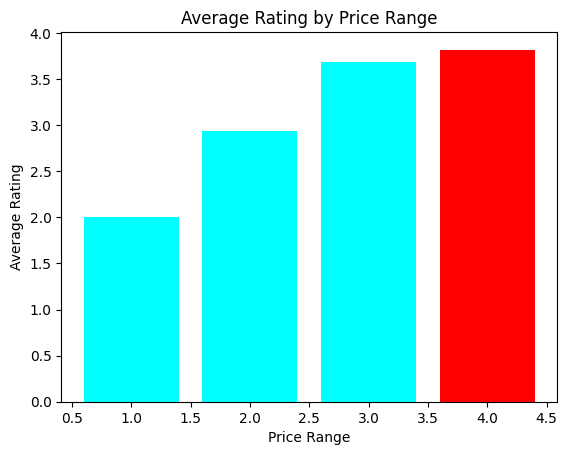

In [8]:
# Identifying the color that represents the highest average rating among different price ranges
# Find the price range with the highest average rating
highest_avg_rating_color = avg_rating_by_price_range.idxmax()

# Create the bar plot
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='cyan')

# Set the color of the bar corresponding to the highest average rating to a distinct color (e.g., red)
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='red')

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

# Highlight the bar for the highest average rating
plt.show()

## ***Task 3: Feature Engineering***

### Extract Additional Features

In [10]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address
# Creating a new column for the length of restaurant names
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Creating a new column for the length of restaurant addresses
df['Address Length'] = df['Address'].apply(len)

# Displaying the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Create New Features


In [13]:
# Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
# Creating new binary columns
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

# Droping the original categorical columns if needed
# df = df.drop(['Has Table booking', 'Has Online delivery'], axis=1)

# Displaying the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


# **Conclusion**

The insights which i found from the overall level 2 project:

**Table Booking and Online Delivery:**

- Approximately 12.12% of restaurants offer table booking, while 25.66% provide online delivery services.
- Restaurants with table booking have a significantly higher average rating of 3.44, compared to 2.56 for those without this service.
- Online delivery is more prevalent in restaurants with medium-priced food products.

**Price Range Analysis:**

- The most common price range among restaurants is 1.
- Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1.

**Feature Engineering:**

- Introduced two new columns, 'Restaurant Name Length' and 'Address Length,' based on the length of restaurant names and addresses.
- Additionally, created two binary columns, 'Has Table Booking' and 'Has Online Delivery,' by encoding categorical variables.

These findings provide valuable insights into the relationships between services, price ranges, and ratings in the restaurant dataset, enhancing our understanding of the industry.